<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/Edulearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise Exploratória dos Dados

## Censo 2019 - Cursos

In [10]:
import pandas as pd
df = pd.read_csv('sup_curso_219.csv', sep='|', encoding='latin-1', usecols= [1,2,3,5,8,9,20,21,22,23,24,25,26,27,28,29,30,31,32])
df.head()

,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_UF,CO_CURSO,NO_CURSO,IN_AJUDA_DEFICIENTE,IN_MATERIAL_DIGITAL,IN_MATERIAL_AMPLIADO,IN_MATERIAL_TATIL,IN_MATERIAL_IMPRESSO,IN_MATERIAL_AUDIO,IN_MATERIAL_BRAILLE,IN_MATERIAL_LIBRAS,IN_DISCIPLINA_LIBRAS,IN_TRADUTOR_LIBRAS,IN_GUIA_INTERPRETE,IN_RECURSOS_COMUNICACAO,IN_RECURSOS_INFORMATICA
0,1,1,1,51.0,1,DIREITO,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,1,51.0,2,CIÊNCIAS ECONÔMICAS,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1,51.0,3,ENGENHARIA CIVIL,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,51.0,6,PEDAGOGIA,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1,1,1,51.0,7,SERVIÇO SOCIAL,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Evolução de alunos matriculados

A partir dos dados existentes nas sinopses estatíticas (http://inep.gov.br/sinopses-estatisticas-da-educacao-superior)

In [6]:
total_matriculados = pd.read_csv('total_matriculados.csv')
total_matriculados

,ANO,MATRICULADOS
0,2011,23250
1,2012,27143
2,2013,29034
3,2014,33377
4,2015,37927
5,2016,35891
6,2017,38272
7,2018,43633
8,2019,48520


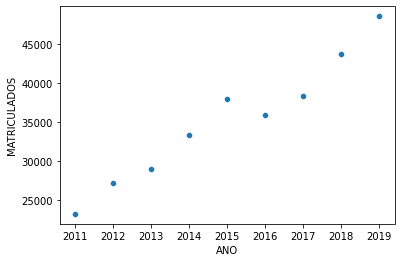

In [7]:
import seaborn as sns
evolucao = sns.scatterplot(x='ANO', y='MATRICULADOS', data=total_matriculados)

# Censo 2019 - Alunos

In [8]:
alunos_2019 = pd.read_csv('alunodeficiente_2019.csv')
alunos_2019

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_CURSO,CO_CURSO_POLO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,TP_NIVEL_ACADEMICO,CO_CINE_ROTULO,ID_ALUNO,CO_ALUNO_CURSO,CO_ALUNO_CURSO_ORIGEM,TP_COR_RACA,TP_SEXO,NU_ANO_NASCIMENTO,NU_MES_NASCIMENTO,NU_DIA_NASCIMENTO,NU_IDADE,TP_NACIONALIDADE,CO_PAIS_ORIGEM,CO_UF_NASCIMENTO,CO_MUNICIPIO_NASCIMENTO,IN_DEFICIENCIA,IN_DEFICIENCIA_AUDITIVA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_INTELECTUAL,IN_DEFICIENCIA_MULTIPLA,IN_DEFICIENCIA_SURDEZ,IN_DEFICIENCIA_SURDOCEGUEIRA,IN_DEFICIENCIA_BAIXA_VISAO,IN_DEFICIENCIA_CEGUEIRA,IN_DEFICIENCIA_SUPERDOTACAO,IN_TGD_AUTISMO,IN_TGD_SINDROME_ASPERGER,IN_TGD_SINDROME_RETT,IN_TGD_TRANSTOR_DESINTEGRATIVO,TP_SITUACAO,QT_CARGA_HORARIA_TOTAL,...,IN_FIN_REEMB_ENT_EXTERNA,IN_FIN_REEMB_OUTRA,IN_FIN_NAOREEMB_PROUNI_INTEGR,IN_FIN_NAOREEMB_PROUNI_PARCIAL,IN_FIN_NAOREEMB_ESTADUAL,IN_FIN_NAOREEMB_MUNICIPAL,IN_FIN_NAOREEMB_PROG_IES,IN_FIN_NAOREEMB_ENT_EXTERNA,IN_FIN_NAOREEMB_OUTRA,IN_APOIO_SOCIAL,IN_APOIO_ALIMENTACAO,IN_APOIO_BOLSA_PERMANENCIA,IN_APOIO_BOLSA_TRABALHO,IN_APOIO_MATERIAL_DIDATICO,IN_APOIO_MORADIA,IN_APOIO_TRANSPORTE,IN_ATIVIDADE_EXTRACURRICULAR,IN_COMPLEMENTAR_ESTAGIO,IN_COMPLEMENTAR_EXTENSAO,IN_COMPLEMENTAR_MONITORIA,IN_COMPLEMENTAR_PESQUISA,IN_BOLSA_ESTAGIO,IN_BOLSA_EXTENSAO,IN_BOLSA_MONITORIA,IN_BOLSA_PESQUISA,TP_ESCOLA_CONCLUSAO_ENS_MEDIO,IN_ALUNO_PARFOR,TP_SEMESTRE_CONCLUSAO,TP_SEMESTRE_REFERENCIA,IN_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA,TP_MOBILIDADE_ACADEMICA_INTERN,CO_IES_DESTINO,CO_PAIS_DESTINO,IN_MATRICULA,IN_CONCLUINTE,IN_INGRESSO_TOTAL,IN_INGRESSO_VAGA_NOVA,IN_INGRESSO_PROCESSO_SELETIVO,NU_ANO_INGRESSO
0,2019,1,1,1,1,NaN,3.0,1.0,1,1,0421D01,BD8D4626244A839A308F0AA4240CE43F,73957887,NaN,3,2,1989,2,4,30,1,76,NaN,NaN,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,0.0,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2018
1,2019,1,1,1,1,NaN,3.0,1.0,1,1,0421D01,5EF5CD63C43D9B59200FDFCD2E1ACE36,73995907,NaN,3,1,1982,2,19,37,1,76,NaN,NaN,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,0.0,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2019
2,2019,1,1,1,1,NaN,3.0,1.0,1,1,0421D01,2E56350182EF8B7FFF2C114F0B52B7DD,73999406,NaN,3,2,1978,8,14,41,1,76,NaN,NaN,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,0.0,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2018
3,2019,1,1,1,1,NaN,3.0,1.0,1,1,0421D01,70F6C562984F1CC4EB1A287A8EC1AF9F,73979809,NaN,3,1,1984,4,15,35,1,76,NaN,NaN,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,3700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,2018
4,2019,1,1,1,1,NaN,3.0,1.0,1,1,0421D01,C6DDD99D39270AB04FE9382687D38C31,73959895,NaN,3,2,1992,2,4,27,1,76,NaN,NaN,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,0.0,NaN,NaN,NaN,NaN,1,0,0,0,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66745,2019,23713,2,3,1503889,NaN,3.0,3.0,1,1,0615S03,186001193B919D39F87CAE74B1153B66,48296255,NaN,0,2,1990,6,14,29,1,76,33.0,3304557.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,0.0,NaN,NaN,NaN,NaN,1,0,1,1,NaN,2019
66746,2019,23713,2,3,1503889,NaN,1.0,3.0,1,1,0615S0